In [131]:
# %% --- Bloque Code 1: Importaciones y Carga ---
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import joblib
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # <<< AÑADIR ESTA IMPORTACIÓN

print("Librerías importadas para predicción basada en código.")
# --- Cargar Modelo y Scalers ---
# Asegúrate de que estas rutas sean correctas
model_folder = "trained_model"
scaler_folder = "scalers"
model_path = os.path.join(model_folder, "lstm_demand_model.keras")
feature_scaler_path = os.path.join(scaler_folder, "feature_scaler.joblib")
target_scaler_path = os.path.join(scaler_folder, "target_scaler.joblib")
try:
    model = keras.models.load_model(model_path)
    print(f"Modelo cargado desde {model_path}")
    feature_scaler = joblib.load(feature_scaler_path)
    target_scaler = joblib.load(target_scaler_path)
    print(f"Scalers cargados desde {scaler_folder}")
except Exception as e:
    raise IOError(f"Error al cargar el modelo o los scalers: {e}")

# --- Definir Parámetros Clave ---
WINDOW_SIZE_HOURS = 336 # 2 semanas
N_FEATURES = 5
required_cols = ['Mes', 'Hour', 'Season', 'Dia_habil', 'kWh']

print("Componentes cargados y parámetros definidos.")

Librerías importadas para predicción basada en código.
Modelo cargado desde trained_model/lstm_demand_model.keras
Scalers cargados desde scalers
Componentes cargados y parámetros definidos.


In [132]:
# %% --- Bloque Code 2: Cargar Datos Históricos ---
try:
    print("Cargando datos históricos...")
    df_historical_full = pd.read_csv("../data/df_demanda.csv", parse_dates=["Datetime"])
    df_historical_full.set_index("Datetime", inplace=True)
    df_historical_full = df_historical_full.sort_index()
    # Verificar columnas requeridas
    if not all(col in df_historical_full.columns for col in required_cols):
         missing = [col for col in required_cols if col not in df_historical_full.columns]
         raise ValueError(f"Faltan columnas requeridas en el histórico completo: {missing}")
    print(f"Datos históricos cargados. Rango: {df_historical_full.index.min()} a {df_historical_full.index.max()}")
except FileNotFoundError:
    raise FileNotFoundError("Asegúrate de que el archivo de datos históricos exista en la ruta especificada.")
except Exception as e:
    raise RuntimeError(f"Error al cargar o procesar datos históricos completos: {e}")

Cargando datos históricos...
Datos históricos cargados. Rango: 2010-01-04 00:00:00 a 2025-04-14 23:00:00


In [133]:
# %% --- Bloque Code 2: Cargar Datos Históricos ---
try:
    print("Cargando datos históricos...")
    df_historical_full = pd.read_csv("../data/df_demanda.csv", parse_dates=["Datetime"])
    df_historical_full.set_index("Datetime", inplace=True)
    df_historical_full = df_historical_full.sort_index()
    # Verificar columnas requeridas
    if not all(col in df_historical_full.columns for col in required_cols):
         missing = [col for col in required_cols if col not in df_historical_full.columns]
         raise ValueError(f"Faltan columnas requeridas en el histórico completo: {missing}")
    print(f"Datos históricos cargados. Rango: {df_historical_full.index.min()} a {df_historical_full.index.max()}")
except FileNotFoundError:
    raise FileNotFoundError("Asegúrate de que el archivo de datos históricos exista en la ruta especificada.")
except Exception as e:
    raise RuntimeError(f"Error al cargar o procesar datos históricos completos: {e}")


--- Determinando Fecha de Inicio: Buscando el Domingo 3 semanas ANTES del último Domingo completo ---
Última fecha/hora disponible en los datos: 2025-04-14 23:00:00
Buscando hacia atrás desde 2025-04-14 23:00 hasta 2023-04-15 23:00
  Domingo encontrado #1: 2025-04-13 23:00
*** Objetivo encontrado (1º Domingo hacia atrás): 2025-04-13 23:00 ***

Domingo seleccionado como FIN de la ventana de entrada (0 antes del último): 2025-04-13 23:00
Fecha de inicio de entrada VALIDADA (Lunes 00:00): 2025-03-31 00:00


In [134]:
# %% --- Bloque Code 2: Cargar Datos Históricos ---
try:
    print("Cargando datos históricos...")
    df_historical_full = pd.read_csv("../data/df_demanda.csv", parse_dates=["Datetime"])
    df_historical_full.set_index("Datetime", inplace=True)
    df_historical_full = df_historical_full.sort_index()
    # Verificar columnas requeridas
    if not all(col in df_historical_full.columns for col in required_cols):
         missing = [col for col in required_cols if col not in df_historical_full.columns]
         raise ValueError(f"Faltan columnas requeridas en el histórico completo: {missing}")
    print(f"Datos históricos cargados. Rango: {df_historical_full.index.min()} a {df_historical_full.index.max()}")
except FileNotFoundError:
    raise FileNotFoundError("Asegúrate de que el archivo de datos históricos exista en la ruta especificada.")
except Exception as e:
    raise RuntimeError(f"Error al cargar o procesar datos históricos completos: {e}")


Iniciando predicción con entrada desde 2025-03-31 00:00...
Ventana de entrada confirmada: 2025-03-31 00:00 a 2025-04-13 23:00 (336 puntos)
Realizando predicción con el modelo...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicción completada.
Predicción generada para el período: 2025-04-14 00:00 a 2025-04-27 23:00

Ignorando las primeras 6 horas de la PREDICCIÓN para el cálculo de MÉTRICAS.
Las métricas se calcularán desde: 2025-04-14 06:00

--- Comparando Predicción con Datos Reales Más Recientes Disponibles ---
   (Métricas calculadas ignorando las primeras 6h de predicción)
Rango de Predicción Generado Originalmente: 2025-04-14 00:00 a 2025-04-27 23:00
Última fecha con datos reales: 2025-04-14 23:00
Rango efectivo con datos reales disponibles: 2025-04-14 00:00 a 2025-04-14 23:00

Calculando métricas sobre 18 puntos de datos (desde 2025-04-14 06:00).

--- Comparación Detallada (Inicio y Fin del Período de MÉTRICAS) ---
                     Predicted_kWh  Actual_kWh  Absolute_Error  \
Date

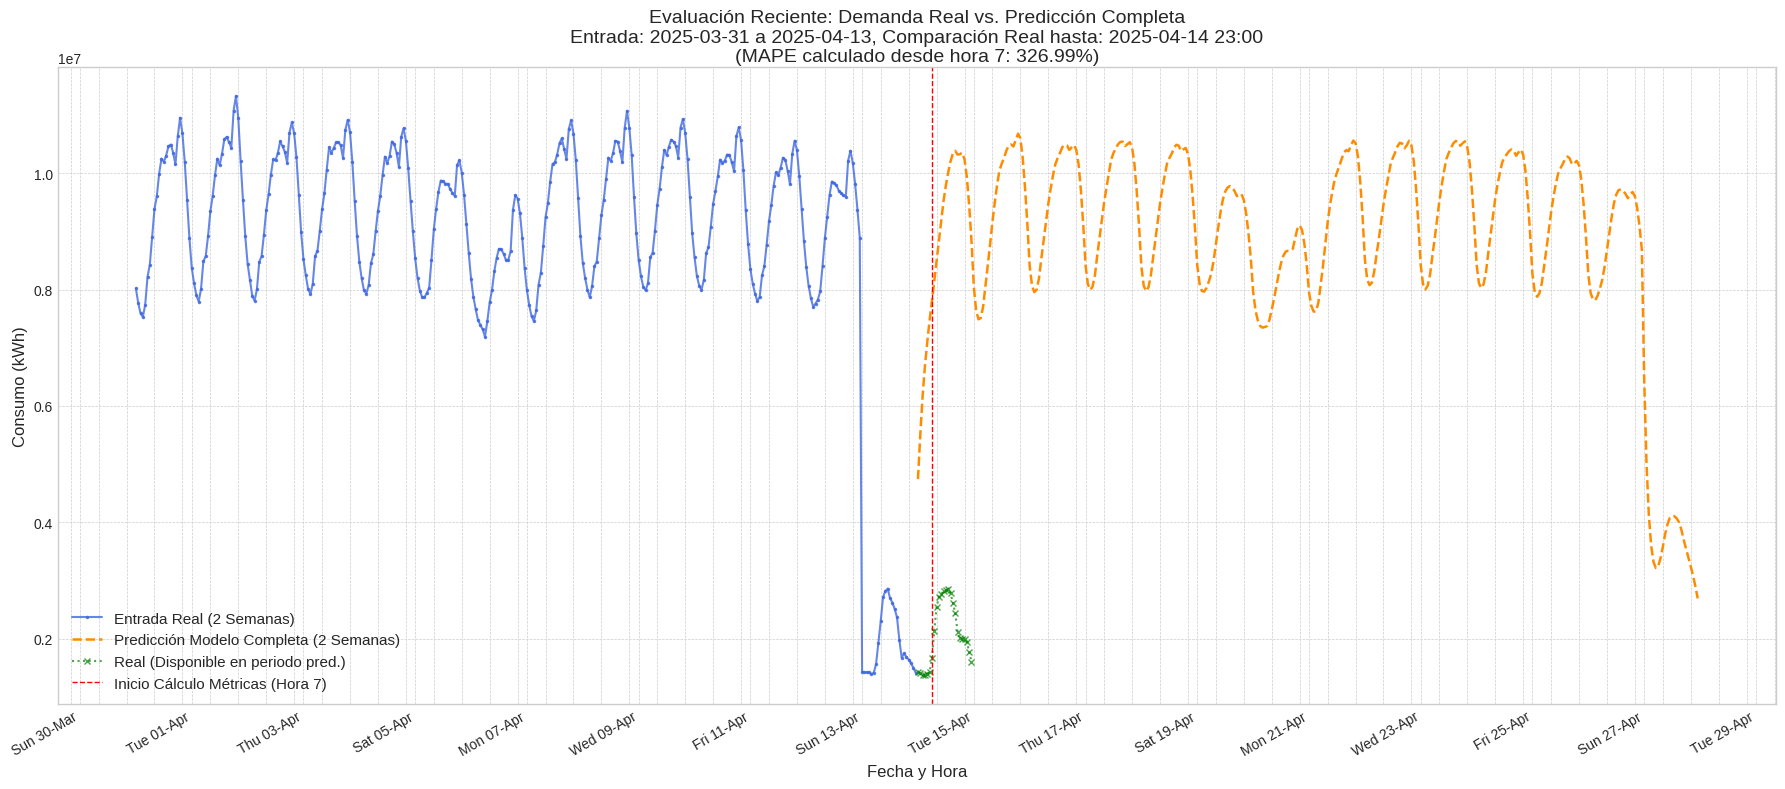

In [ ]:
# %% --- Bloque Code 2: Cargar Datos Históricos ---
try:
    print("Cargando datos históricos...")
    df_historical_full = pd.read_csv("../data/df_demanda.csv", parse_dates=["Datetime"])
    df_historical_full.set_index("Datetime", inplace=True)
    df_historical_full = df_historical_full.sort_index()
    # Verificar columnas requeridas
    if not all(col in df_historical_full.columns for col in required_cols):
         missing = [col for col in required_cols if col not in df_historical_full.columns]
         raise ValueError(f"Faltan columnas requeridas en el histórico completo: {missing}")
    print(f"Datos históricos cargados. Rango: {df_historical_full.index.min()} a {df_historical_full.index.max()}")
except FileNotFoundError:
    raise FileNotFoundError("Asegúrate de que el archivo de datos históricos exista en la ruta especificada.")
except Exception as e:
    raise RuntimeError(f"Error al cargar o procesar datos históricos completos: {e}")